
# Project: Investigate a Dataset : TMDb Dataset



<a id='intro'></a>
## Introduction

> The dataset selected is the TMDb dataset that contains the data on movies and ratings.

> Exploration done:
- How has been the popularity change over the years?
- How has the Revenue change been over the years?
- How has the Runtime change been over the years?

> Relationship and change observed over two variables
- How has the popularity change been with the revenue change
- How has the vote cou change been with the revenue change
- How has the vote average change been with the revenue change

Some questions to be answered are:
- What are the popularity values, runtime values and revenus over the covered time period?
- How does revenue change with respect to the popularity?
- Is there a relationship betweeen the length of the movie and revenue?


In [4]:
import csv
from datetime import datetime # operations to parse dates
import pandas as pd
import matplotlib.pyplot as plt
#magic 
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

- The number of rows is 10866 and number of columns is 21
- Null values  present in variables cast, homepage, tagline, director, keywords, genres, production_companies, imdb_id 
- Removal of all duplicate records.
- removal of records with missing values which play a role in analysis. all those records which contain null values in features which arent essential to analysis were not removed.



In [5]:
dataFrame = pd.read_csv('tmdb-movies (1).csv')
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#Removing duplicate records.
dataFrame.drop_duplicates(inplace=True)

In [7]:
#checking out changed dataFrame value.
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

### NULL Values:
This step is to inspect if data is sufficient for initial exploration and research. Depending on the results, we also will have to decide on how best to tackle missing values, based on their relative proportion to complete data.

In [8]:
# count of nulls in every column
dataFrame.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

# Removing Nulls

Removing records which contain Null values in colum imdb_id

In [9]:
#removing records which have na in imdb_id column
dataFrame.dropna(subset=['imdb_id'], inplace=True)  
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [21]:
dataFrame.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [12]:
dataFrame.to_csv('data_imdb.csv', index=False)

<a id='eda1'></a>
## Exploratory Data Analysis
### Checking the following trends over a certain duration
-- Changes in popularity, run time of movies and revenue ?

- We first sort by release_year


In [13]:
# Importing data from newly cleaned dataset
dataFrame_imdb = pd.read_csv('data_imdb.csv')
dataFrame_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10855 entries, 0 to 10854
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

- In this section, we want to explore trends over time. 
- We inspect Revenue popularity runtime over a particular duration of time.
- We take the average by taking the inbuilt "mean" function

In [14]:
#groupby year.
dataFrame_new = dataFrame_imdb.groupby('release_year').mean()

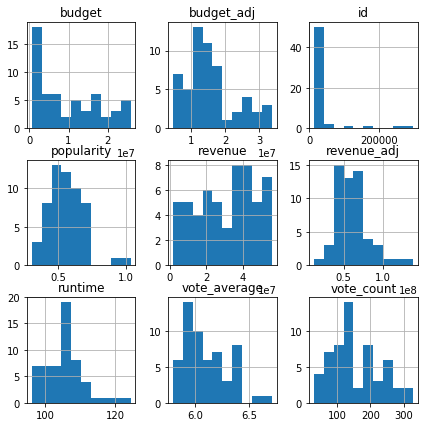

In [15]:
#providing suitable visualisation for all 
dataFrame_new.hist(figsize=(7, 7));

<a id='runtime'></a>
### Frequency of movie runtimes:
-- analysing the most frequent runtime

Text(0.5,0,'movie duration(in minutes)')

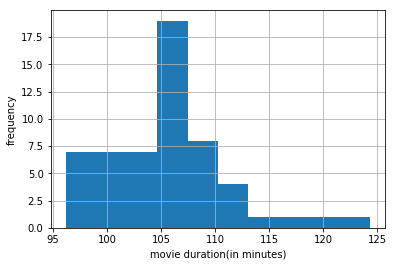

In [16]:

dataFrame_new['runtime'].hist(bins=10)
plt.ylabel('frequency')
plt.xlabel('movie duration(in minutes)')


In [17]:
# giving some stats related to movie runtimes
dataFrame_new['runtime'].describe() 

count     56.000000
mean     105.714644
std        5.508458
min       96.179331
25%      101.910776
50%      105.678699
75%      107.593247
max      124.343750
Name: runtime, dtype: float64

### What I Observed:
- The Most popular runtime is between 105-110 minutes.
- The distribution has a positive skew

<a id='popularity'></a>

### popularity of the movies.:
- Accordingly, we use a visualisation to observe  frequencies of popularities over given time period
- Maximum counts will reflect the typical popularity rating of movies

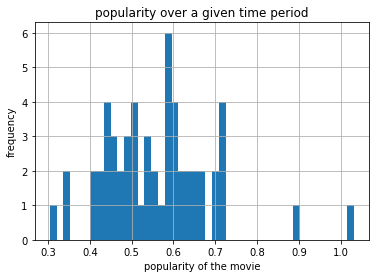

In [18]:
dataFrame_new['popularity'].hist(bins=45)
plt.ylabel('frequency')
plt.xlabel('popularity of the movie')

plt.title('popularity over a given time period');

In [19]:
#giving some stats related to movie popularity
dataFrame_new['popularity'].describe()

count    56.000000
mean      0.559693
std       0.128434
min       0.304112
25%       0.469625
50%       0.546928
75%       0.626934
max       1.032126
Name: popularity, dtype: float64

### Observations about Popularity Ratings:
- The distribution is skewed towards the right
- frequency is maximum for popularity range(0.5 - 0.6)

<a id='revenue'></a>

### Revenue:
- Analysing which revenue value/range has maximum frequency
- visualising using a histogram

In [23]:
#Exploring revenue variable over the years to determine typical revenues grossed by the movies
dataFrame_new['revenue'].hist(bins=19)
plt.xlabel('Revenue')
plt.ylabel('Freq')
plt.title('revenue across a given period of time');

In [24]:
#giving some stats about revenue

dataFrame_new['revenue'].describe() 

count    5.600000e+01
mean     3.076766e+07
std      1.574209e+07
min      1.842102e+06
25%      1.815642e+07
50%      3.257984e+07
75%      4.293171e+07
max      5.549569e+07
Name: revenue, dtype: float64

### Observations of Revenues:
From the plots and histogram, we can see that:
- maximum frequency revenue value is ~4e7
- left skewed distribution

<a id='eda2'></a>

## Exploratory Data Analysis

### Research Question 2
#### Analysing what variables can be associated with revenue across the years
Steps:
- We use scatterplot to do our visualizations
- we visualize two variables.
- Here, we visualize the relations between two variables using scatter plots to view the associations [if any]. 
- We Visualize the following :
<ul>
<li><a href="#rev_pop">Popularity of the movie vs Revenue</a></li>
<li><a href="#rev_vc">VoteCount of the movie vs Revenue of the movie</a></li>
<li><a href="#rev_va">runtime of the movie vs revenue of the movie</a></li>
</ul>



In [32]:
dataFrame_new.corr(method='pearson') 

id  popularity    budget   revenue   runtime  vote_count  \
id            1.000000    0.612610  0.100292  0.152558 -0.441775    0.539964   
popularity    0.612610    1.000000  0.668215  0.759156 -0.488974    0.849314   
budget        0.100292    0.668215  1.000000  0.906124 -0.401485    0.782026   
revenue       0.152558    0.759156  0.906124  1.000000 -0.466239    0.809243   
runtime      -0.441775   -0.488974 -0.401485 -0.466239  1.000000   -0.612715   
vote_count    0.539964    0.849314  0.782026  0.809243 -0.612715    1.000000   
vote_average -0.297719   -0.574979 -0.731797 -0.706442  0.524770   -0.658819   
budget_adj   -0.148336    0.458952  0.891925  0.767164 -0.073168    0.505434   
revenue_adj  -0.299723   -0.100506 -0.158415  0.074952  0.300077   -0.215568   

              vote_average  budget_adj  revenue_adj  
id               -0.297719   -0.148336    -0.299723  
popularity       -0.574979    0.458952    -0.100506  
budget           -0.731797    0.891925    -0.158415  
revenue          -0.706442    0.767164     0.074952  
runtime           0.524770   -0.073168     0.300077  
vote_count       -0.658819    0.505434    -0.215568  
vote_average      1.000000   -0.557569     0.377204  
budget_adj       -0.557569    1.000000     0.050086  
revenue_adj       0.377204    0.050086     1.000000

##### From, the above correlation answers, we can see that :
- For higher vote count and popularity the rating is higher
- for lower vote average the revenue is high.


We now plot the three comparisons using scatter plot.

<a id='rev_pop'></a>

### Revenue of the movie vs Popularity of the movie:
Here, we view just how popularity and revenue are related using a scatterplot.

In [34]:
plt.scatter(x = dataFrame_new['popularity'], y = dataFrame_new['revenue'])
plt.ylabel('Revenue of the movie')
plt.xlabel('Popularity of the movie')

- We see from the scatterplot that for higher popularity there is higher revenue.
- there are a couple of exceptions which have high popularity but not very high revenues.

<a id='rev_vc'></a>

### Revenue of the movie vs Vote counts of the movie:

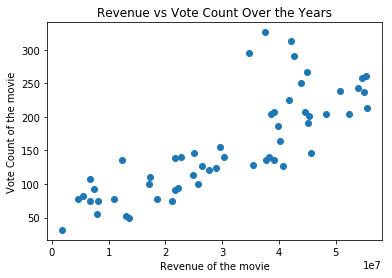

In [33]:
plt.scatter(y = dataFrame_new['vote_count'], x = dataFrame_new['revenue'])
plt.xlabel('Revenue of the movie')
plt.ylabel('Vote Count of the movie')

#### Observations- Revenue vs Vote Count:
- For higher vote count the revenue is higher 
- We have a few exception points in which high votecount values did not gross very high


<a id='rev_va'></a>

### Revenue of the movie vs Vote averages of the movie:

In [36]:
plt.scatter(y = dataFrame_new['revenue'], x = dataFrame_new['vote_average'])
plt.ylabel('revenue of movie')
plt.xlabel('Vote Averages ov movie')

Text(0.5,0,'Vote Averages ov movie')

#### Observations- Revenue vs Vote Average:
- For high revenue the vote average is low
- there are outliers which have low average and low revenue.

<a id='limitations'></a>
## limtations of the process:
- Variables operated upon were all numeric. 
- In case of varying currencies [which is likely since the movies range from different regions], exchange rates or conversions or some sort of normalization would need to be applied.
- We are not diving deep into the variables and they are being taken as general.. 

<a id='conclusions'></a>
## Conclusions

- We saw Revenue and Vote count were positively proportional
- We saw Revenue and popularity were positively proportional
- We saw Revenue and vote average were positively proportional
- Highest frequency runtime was ~105 minutes
- Highest frequency popularity ~0.57
- Highest frequency revenue was ~4e7


In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255